In [94]:
import importlib
import numpy as np
from tensorflow.keras import layers, losses
import tensorflow as tf
import seaborn as sns
import autoencoder as ae
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

def dataset_path(name, opacity, radius, pixel_size, grid_size):
	return "_".join([name, str(opacity), str(radius), str(pixel_size), str(grid_size)])


In [88]:
dataset_size = 10000
pixel_size = 1024
grid_size = 64
radius = 15
opacity = 0.2
pca_path = f"./random_clusters/{dataset_path('digitspca', opacity, radius, pixel_size, grid_size)}"
tsne_path = f"./random_clusters/{dataset_path('digitstsne', opacity, radius, pixel_size, grid_size)}"

pca_train_set = np.empty(shape=(dataset_size, grid_size, grid_size))
for i in range(dataset_size):
	curr = np.load(f"{pca_path}/{str(i)}.npy")
	pca_train_set[i, :, :] = curr[:, :]

tsne_train_set = np.empty(shape=(dataset_size, grid_size, grid_size))
for i in range(dataset_size):
	curr = np.load(f"{tsne_path}/{str(i)}.npy")
	tsne_train_set[i, :, :] = curr[:, :]

In [97]:
with tf.device('/device:GPU:1'):
	pca_autoencoder = ae.ClusterAutoEncoder(grid_size=64, latent_dim=2)
	pca_autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
	pca_autoencoder.fit(pca_train_set, pca_train_set, epochs=10, shuffle=True,)

	tsne_autoencoder = ae.ClusterAutoEncoder(grid_size=64, latent_dim=2)
	tsne_autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
	tsne_autoencoder.fit(tsne_train_set, tsne_train_set, epochs=10, shuffle=True,)

Epoch 1/10
313/313 [==============================] - 4s 10ms/step - loss: 0.0249
Epoch 2/10
313/313 [==============================] - 3s 10ms/step - loss: 0.0097
Epoch 3/10
313/313 [==============================] - 3s 10ms/step - loss: 0.0082
Epoch 4/10
313/313 [==============================] - 3s 10ms/step - loss: 0.0077
Epoch 5/10
313/313 [==============================] - 3s 10ms/step - loss: 0.0073
Epoch 6/10
313/313 [==============================] - 3s 10ms/step - loss: 0.0071
Epoch 7/10
313/313 [==============================] - 3s 10ms/step - loss: 0.0069
Epoch 8/10
313/313 [==============================] - 3s 10ms/step - loss: 0.0067
Epoch 9/10
313/313 [==============================] - 3s 10ms/step - loss: 0.0066
Epoch 10/10
313/313 [==============================] - 3s 10ms/step - loss: 0.0064
Epoch 1/10
313/313 [==============================] - 4s 10ms/step - loss: 0.0131
Epoch 2/10
313/313 [==============================] - 3s 10ms/step - loss: 0.0076
Epoch 3/10
313/

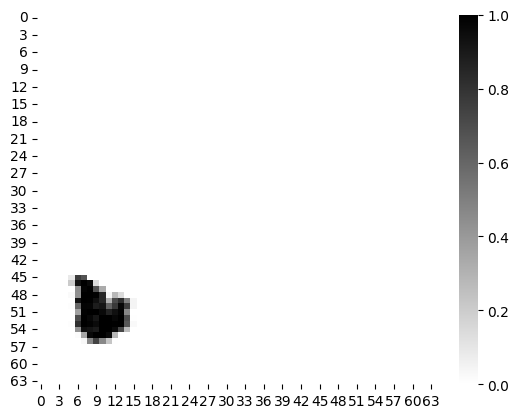

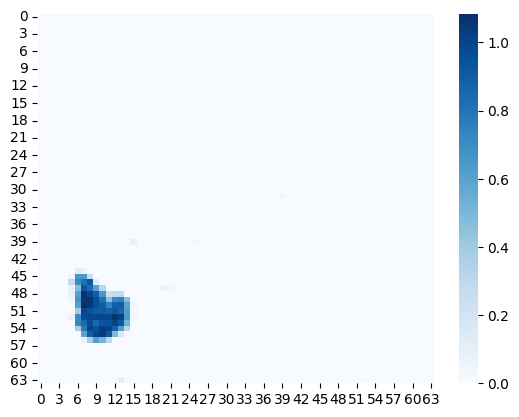

In [99]:
## reconstruction test
index =3000
with tf.device('/device:GPU:1'):
	decoded = tsne_autoencoder.call(tsne_train_set[index:index+1])[0].numpy()

original = tsne_train_set[index]
sns.heatmap(original, cmap='binary')
plt.show()

decoded = decoded.reshape(grid_size, grid_size)
sns.heatmap(decoded, cmap='Blues')
plt.show()

In [100]:
with tf.device('/device:GPU:1'):

	print("extracting latent...")
	tsne_latent = tsne_autoencoder.encoder(tsne_train_set).numpy()
	pca_latent = pca_autoencoder.encoder(pca_train_set).numpy()

	# print("performing tsne...")
	# tsne_latent_2d = TSNE(n_components=2).fit_transform(tsne_latent)
	# pca_latent_2d = TSNE(n_components=2).fit_transform(pca_latent)

	print("plotting...")


extracting latent...
plotting...


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


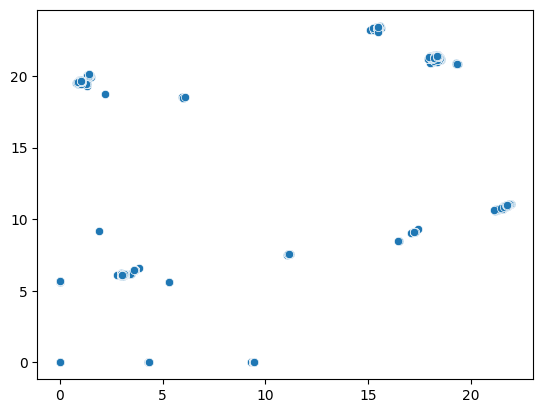

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[[145.547    111.8579  ]
 [163.23973   26.709717]
 [ 28.31167  124.32803 ]
 ...
 [101.02767  136.67055 ]
 [171.07437   42.63986 ]
 [104.2718   123.76362 ]]


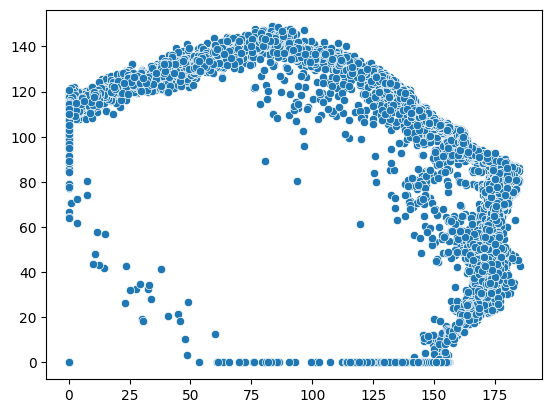

In [102]:
	sns.scatterplot(tsne_latent[:, 0], tsne_latent[:, 1])
	plt.show()
	sns.scatterplot(pca_latent[:, 0], pca_latent[:, 1])
	plt.show()
	